## 使うライブラリをインポートして，乱数のseedを固定

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


seed  = 11
np.random.seed(seed)

### フィッティングしたいデータセット$\mathcal{D}$を生成
$$\mathcal{D} = \{ (x_1,y_1),(x_2,y_2), \cdots , (x_N, y_N)\}$$

[[-0.05007295  8.14582518]
 [ 2.97444397  8.00846281]
 [-1.04457679 -5.27669595]
 [ 1.01278942  3.64309719]
 [ 9.42350407 22.67908514]]


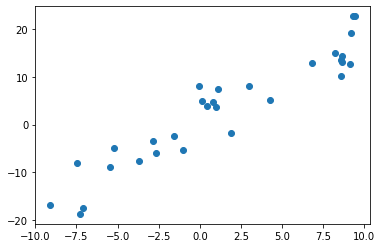

In [5]:
N = 30
x =  20 * (np.random.rand(N)) - 10
y = np.sin(x) + x + np.random.normal(x, 5, N)

# 2次元 * N個の観測データ
D = np.concatenate([x[:, np.newaxis], y[:, np.newaxis]], axis=1)
print(D[:5])

plt.scatter(x,y)
plt.show()

## モデルのパラメータ$\boldsymbol{a}$を推定する準備（変数をおく）
$$ \boldsymbol{x}_i = \begin{pmatrix}
    1\\
    x_i
    \end{pmatrix}
$$

$$ \boldsymbol{X} = \begin{pmatrix}
     \boldsymbol{x_1}^T\\
    \boldsymbol{x_2}^T\\
    \vdots \\
    \boldsymbol{x_N}^T
    \end{pmatrix}
$$

$$\boldsymbol{y} = \begin{pmatrix}
    y_1\\
    y_2\\
    \vdots \\
    y_N
    \end{pmatrix}
$$

In [7]:
# x(shape: (2, N)...これは(1,x_i)を並べた行列)
ones = np.ones(N)
X = np.concatenate([ones[:, np.newaxis], x[:, np.newaxis]], axis=1)
print(X[:5])

# y（shape: (N,1)）になるようにshapeを整える）
y_reshaped = y[:,np.newaxis]
print(y.shape)

[[ 1.         -0.05007295]
 [ 1.          2.97444397]
 [ 1.         -1.04457679]
 [ 1.          1.01278942]
 [ 1.          9.42350407]]
(30,)


## モデルのパラメータ$\boldsymbol{a}$を推定する
$$\boldsymbol{a}
= \begin{pmatrix}a_0\\a_1\end{pmatrix}
= (\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{y}$$

In [8]:
# @は内積の演算子， np.linalg.invは逆行列を計算してくれるライブラリ
a = (np.linalg.inv(X.T @ X) @ X.T) @ y_reshaped
print(a.shape)
print(a)

(2, 1)
[[0.6236742 ]
 [1.79968636]]


## 推定したモデル$\hat{y}$を描画する

In [9]:
# (1, x_{new})が縦に並ぶ行列Xnewをつくる
Nnew = 1000
x_new= np.linspace(start = -10, stop = 10, num = Nnew)
ones = np.ones(Nnew)
Xnew = np.squeeze(np.dstack([ones,x_new]))
print(Xnew.shape)

Y_hat = Xnew @ a
print(Y_hat.shape)

(1000, 2)
(1000, 1)


## 観測データの分布上に学習したモデルをプロットする

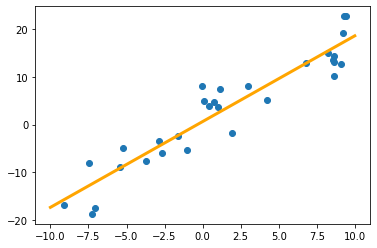

In [10]:
plt.scatter(x,y)
plt.plot(x_new, Y_hat, linewidth=3, color='orange')
plt.show()